In [ ]:
import pandas as pd

# Veri setini yükleme
df = pd.read_csv('kredi_karti_harcamalar_v2.csv')

# İlk beş satırı göster
(df.head())

# Veri setinin genel bilgileri
(df.info())

# Temel istatistikler
(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43453 entries, 0 to 43452
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       43453 non-null  int64  
 1   customer_id          43453 non-null  int64  
 2   transaction_date     43453 non-null  object 
 3   spending_amount      43453 non-null  float64
 4   expense_type         43453 non-null  object 
 5   expense_description  43453 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ MB


,transaction_id,customer_id,spending_amount
count,43453.00000,4.345300e+04,43453.000000
mean,21727.00000,7.414381e+08,146.651835
std,12543.94496,3.814370e+07,364.370115
min,1.00000,7.081343e+08,4.470000
25%,10864.00000,7.128298e+08,18.990000
50%,21727.00000,7.186341e+08,45.560000
75%,32590.00000,7.792164e+08,141.620000
max,43453.00000,8.278908e+08,13153.190000


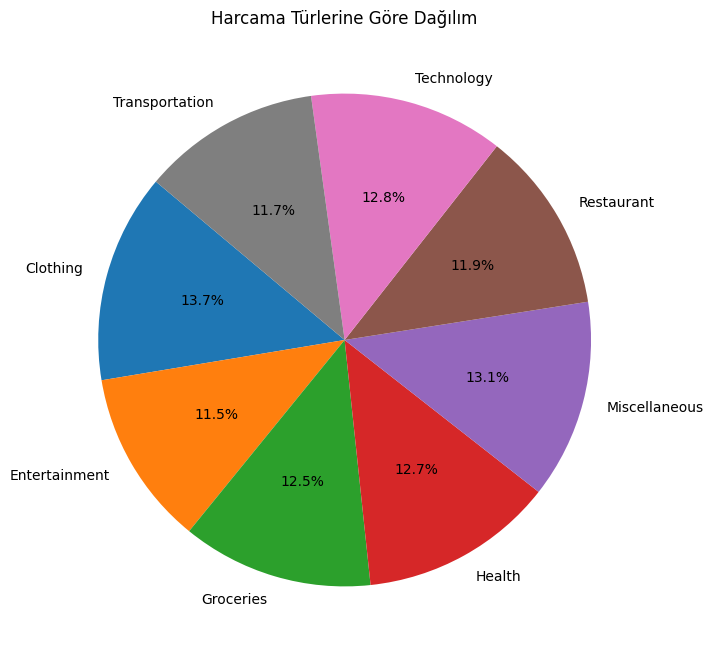

In [ ]:
import matplotlib.pyplot as plt

# Harcama türlerine göre toplam harcamaları hesaplama
category_totals = df.groupby('expense_type')['spending_amount'].sum()

# Pasta grafiği çizdirme
plt.figure(figsize=(10, 8))
plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Harcama Türlerine Göre Dağılım')
plt.show()


In [ ]:
# Mevcut sütun adlarını yazdırma
print(df.columns)


Index(['transaction_id', 'customer_id', 'transaction_date', 'spending_amount',
       'expense_type', 'expense_description'],
      dtype='object')


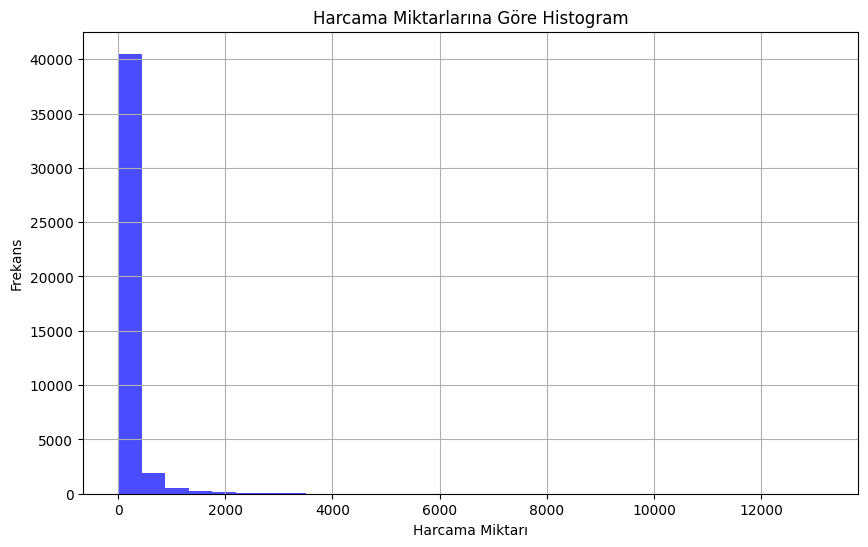

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['spending_amount'], bins=30, color='blue', alpha=0.7)
plt.title('Harcama Miktarlarına Göre Histogram')
plt.xlabel('Harcama Miktarı')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


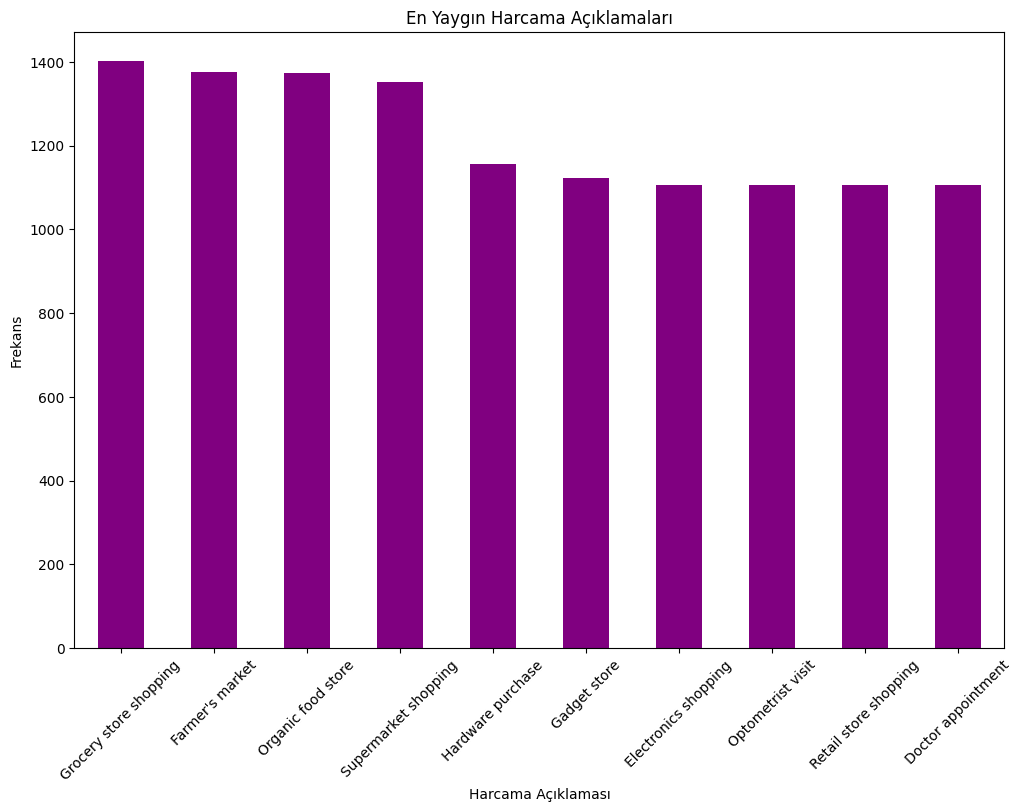

In [ ]:
description_counts = df['expense_description'].value_counts().head(10)  # En sık 10 harcama türü

plt.figure(figsize=(12, 8))
description_counts.plot(kind='bar', color='purple')
plt.title('En Yaygın Harcama Açıklamaları')
plt.xlabel('Harcama Açıklaması')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()


<ipython-input-11-324a71333576>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transaction_date'] = pd.to_datetime(df['transaction_date'])


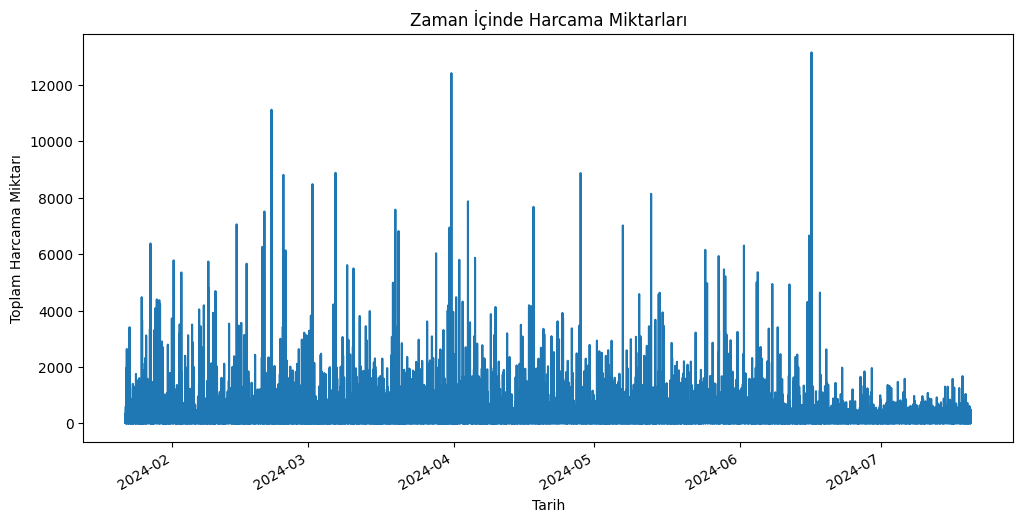

In [ ]:
# İlk olarak, tarih sütununu datetime formatına çevirme
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Tarihe göre gruplama yaparak, her tarihte yapılan toplam harcamayı hesaplama
daily_spending = df.groupby('transaction_date')['spending_amount'].sum()

# Zaman serisi grafiği çizdirme
plt.figure(figsize=(12, 6))
daily_spending.plot()
plt.title('Zaman İçinde Harcama Miktarları')
plt.xlabel('Tarih')
plt.ylabel('Toplam Harcama Miktarı')
plt.show()


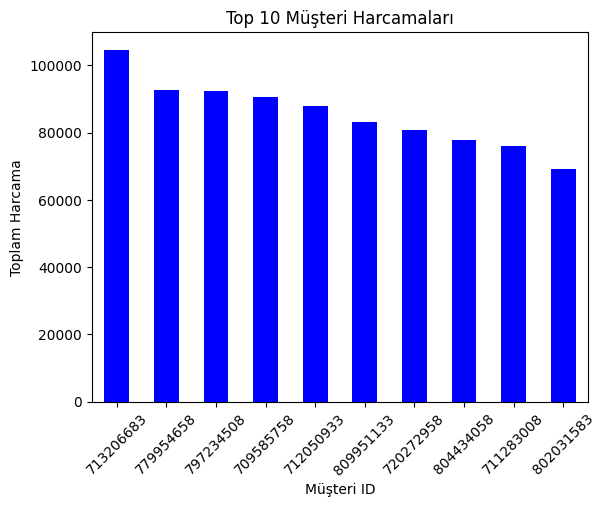

In [ ]:
customer_spending = df.groupby('customer_id')['spending_amount'].sum().sort_values(ascending=False)
top_customers = customer_spending.head(10)

top_customers.plot(kind='bar', color='blue')
plt.title('Top 10 Müşteri Harcamaları')
plt.xlabel('Müşteri ID')
plt.ylabel('Toplam Harcama')
plt.xticks(rotation=45)
plt.show()


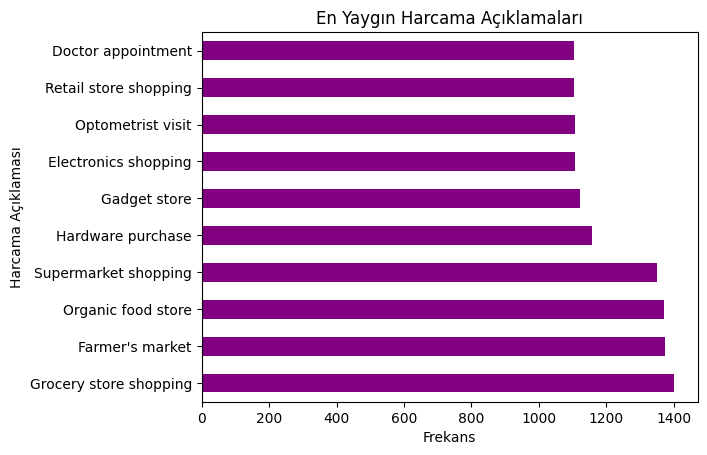

In [ ]:
description_counts = df['expense_description'].value_counts().head(10)

description_counts.plot(kind='barh', color='purple')
plt.title('En Yaygın Harcama Açıklamaları')
plt.xlabel('Frekans')
plt.ylabel('Harcama Açıklaması')
plt.show()
